In [1]:
import pandas as pd
import pandas_datareader.data as pdr
from pandas_datareader.yahoo.actions import YahooActionReader
from datetime import datetime
from datetime import date
from datetime import timedelta
import math
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()


In [2]:
# Step 1: Get and organize data
# Step 2: Run algorithm
# Step 3: Calculate/Analyze Return vs Benchmark(s)
# Step 4: Test Inputs/Tweak Strategy

In [3]:
def cagr(_df):
    df = _df.copy()
    df = df.sort_index(ascending=True)
    df["cum_return"] = (1 + df["return"]).cumprod()
    total_ret = df['cum_return'][-1]
    start = datetime.utcfromtimestamp(df.index.values[0].astype('O')/1e9)
    end = datetime.utcfromtimestamp(df.index.values[-1].astype('O')/1e9)
    period_years = (end - start).days / 365.25
    CAGR = (total_ret)**(1/period_years) - 1
    return CAGR

In [4]:
def volatility(_df):
    start = datetime.utcfromtimestamp(_df.index.values[0].astype('O')/1e9)
    end = datetime.utcfromtimestamp(_df.index.values[-1].astype('O')/1e9)
    period_years = (end - start).days / 365.25
    ratio_to_annual = _df['return'].count() / period_years
    vol = _df["return"].std() * math.sqrt(ratio_to_annual)
    return vol

In [5]:
def sharpe(_df, risk_free_rate):
    ret = cagr(_df)
    vol = volatility(_df)
    sharpe = (ret - risk_free_rate) / vol
    return sharpe

In [6]:
def max_drawdown(_df):
    df = _df.copy()
    df = df.sort_index(ascending=True)
    df["cum_return"] = (1 + df["return"]).cumprod()
    df["cum_return_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_return_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"] / df["cum_return_max"]
    max_dd = df.loc[df["drawdown_pct"].idxmax()]
    return {
        'drawdown': max_dd['drawdown_pct'],
        'date': max_dd.name
    }

In [7]:
start = datetime(1990, 1, 1)
end = datetime.now()
print(start)
print(end)
spy_daily = pdr.get_data_yahoo('SPY',start,end,interval='1d')
spy_daily.head()

1990-01-01 00:00:00
2023-09-12 13:29:22.032473
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.029369,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.207394,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.260794,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.527815,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.634647,531500


In [8]:
# Step 1: Get and organize data

start = datetime(1900, 1, 1)
end = datetime.now()
spy_daily = pdr.get_data_yahoo('SPY',start,end,interval='1d')
spy_daily = spy_daily[['Adj Close']].rename(columns={'Adj Close': 'price'})
spy_daily

[*********************100%%**********************]  1 of 1 completed


,price
Date,
1993-01-29,25.029362
1993-02-01,25.207399
1993-02-02,25.260803
1993-02-03,25.527826
1993-02-04,25.634638
...,...
2023-09-05,449.239990
2023-09-06,446.220001
2023-09-07,444.850006


In [9]:
spy_daily.index

DatetimeIndex(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03',
               '1993-02-04', '1993-02-05', '1993-02-08', '1993-02-09',
               '1993-02-10', '1993-02-11',
               ...
               '2023-08-28', '2023-08-29', '2023-08-30', '2023-08-31',
               '2023-09-01', '2023-09-05', '2023-09-06', '2023-09-07',
               '2023-09-08', '2023-09-11'],
              dtype='datetime64[ns]', name='Date', length=7709, freq=None)

In [10]:
spy = yf.Ticker("SPY")
spy.actions.head()

,Dividends,Stock Splits,Capital Gains
Date,,,
1993-03-19 00:00:00-05:00,0.213,0.0,0.0
1993-06-18 00:00:00-04:00,0.318,0.0,0.0
1993-09-17 00:00:00-04:00,0.286,0.0,0.0
1993-12-17 00:00:00-05:00,0.317,0.0,0.0
1994-03-18 00:00:00-05:00,0.271,0.0,0.0


In [11]:
spy_dividends = spy.actions.rename(columns={'Dividends':'dividend'})
spy_dividends = spy_dividends['dividend']
spy_dividends.index

DatetimeIndex(['1993-03-19 00:00:00-05:00', '1993-06-18 00:00:00-04:00',
               '1993-09-17 00:00:00-04:00', '1993-12-17 00:00:00-05:00',
               '1994-03-18 00:00:00-05:00', '1994-06-17 00:00:00-04:00',
               '1994-09-16 00:00:00-04:00', '1994-12-16 00:00:00-05:00',
               '1995-03-17 00:00:00-05:00', '1995-06-16 00:00:00-04:00',
               ...
               '2021-03-19 00:00:00-04:00', '2021-06-18 00:00:00-04:00',
               '2021-09-17 00:00:00-04:00', '2021-12-17 00:00:00-05:00',
               '2022-03-18 00:00:00-04:00', '2022-06-17 00:00:00-04:00',
               '2022-09-16 00:00:00-04:00', '2022-12-16 00:00:00-05:00',
               '2023-03-17 00:00:00-04:00', '2023-06-16 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=123, freq=None)

In [12]:
spy_dividends.index = spy_dividends.index.tz_localize(None)

In [13]:
spy_dividends

Date
1993-03-19    0.213
1993-06-18    0.318
1993-09-17    0.286
1993-12-17    0.317
1994-03-18    0.271
              ...  
2022-06-17    1.577
2022-09-16    1.596
2022-12-16    1.781
2023-03-17    1.506
2023-06-16    1.638
Name: dividend, Length: 123, dtype: float64

In [14]:
spy = spy_daily.merge(spy_dividends, left_index=True, right_index=True, how='outer')
spy

,price,dividend
Date,,
1993-01-29,25.029362,NaN
1993-02-01,25.207399,NaN
1993-02-02,25.260803,NaN
1993-02-03,25.527826,NaN
1993-02-04,25.634638,NaN
...,...,...
2023-09-05,449.239990,NaN
2023-09-06,446.220001,NaN
2023-09-07,444.850006,NaN


In [15]:
spy[-70:-45]

,price,dividend
Date,,
2023-06-01,420.258911,NaN
2023-06-02,426.336334,NaN
2023-06-05,425.519379,NaN
2023-06-06,426.445923,NaN
2023-06-07,424.971375,NaN
2023-06-08,427.541870,NaN
2023-06-09,428.308990,NaN
2023-06-12,432.194550,NaN
2023-06-13,435.043976,NaN


In [16]:
spy['dividend'] = spy['dividend'].fillna(0)
spy[-70:-55]

,price,dividend
Date,,
2023-06-01,420.258911,0.000
2023-06-02,426.336334,0.000
2023-06-05,425.519379,0.000
2023-06-06,426.445923,0.000
2023-06-07,424.971375,0.000
2023-06-08,427.541870,0.000
2023-06-09,428.308990,0.000
2023-06-12,432.194550,0.000
2023-06-13,435.043976,0.000


In [17]:
spy['price_change'] = spy['price'].pct_change()
spy

,price,dividend,price_change
Date,,,
1993-01-29,25.029362,0.0,NaN
1993-02-01,25.207399,0.0,0.007113
1993-02-02,25.260803,0.0,0.002119
1993-02-03,25.527826,0.0,0.010571
1993-02-04,25.634638,0.0,0.004184
...,...,...,...
2023-09-05,449.239990,0.0,-0.004322
2023-09-06,446.220001,0.0,-0.006722
2023-09-07,444.850006,0.0,-0.003070


In [18]:
spy['dividend_yield'] = spy['dividend'] / spy['price']
spy

,price,dividend,price_change,dividend_yield
Date,,,,
1993-01-29,25.029362,0.0,NaN,0.0
1993-02-01,25.207399,0.0,0.007113,0.0
1993-02-02,25.260803,0.0,0.002119,0.0
1993-02-03,25.527826,0.0,0.010571,0.0
1993-02-04,25.634638,0.0,0.004184,0.0
...,...,...,...,...
2023-09-05,449.239990,0.0,-0.004322,0.0
2023-09-06,446.220001,0.0,-0.006722,0.0
2023-09-07,444.850006,0.0,-0.003070,0.0


In [19]:
spy[-80:-55]

,price,dividend,price_change,dividend_yield
Date,,,,
2023-05-17,413.693298,0.000,0.012139,0.000000
2023-05-18,417.678497,0.000,0.009633,0.000000
2023-05-19,417.070740,0.000,-0.001455,0.000000
2023-05-22,417.240143,0.000,0.000406,0.000000
2023-05-23,412.557526,0.000,-0.011223,0.000000
2023-05-24,409.568604,0.000,-0.007245,0.000000
2023-05-25,413.115448,0.000,0.008660,0.000000
2023-05-26,418.465546,0.000,0.012951,0.000000
2023-05-30,418.624969,0.000,0.000381,0.000000


In [20]:
spy['return'] = spy['dividend_yield'] + spy['price_change']
spy

,price,dividend,price_change,dividend_yield,return
Date,,,,,
1993-01-29,25.029362,0.0,NaN,0.0,NaN
1993-02-01,25.207399,0.0,0.007113,0.0,0.007113
1993-02-02,25.260803,0.0,0.002119,0.0,0.002119
1993-02-03,25.527826,0.0,0.010571,0.0,0.010571
1993-02-04,25.634638,0.0,0.004184,0.0,0.004184
...,...,...,...,...,...
2023-09-05,449.239990,0.0,-0.004322,0.0,-0.004322
2023-09-06,446.220001,0.0,-0.006722,0.0,-0.006722
2023-09-07,444.850006,0.0,-0.003070,0.0,-0.003070


In [21]:
cagr(spy)

0.12626225041961914

In [22]:
def get_returns_for_asset(symbol, start = datetime(1900, 1, 1), end = datetime.now()):
    daily = pdr.get_data_yahoo(symbol,start,end,interval='1d')
    daily = daily[['Adj Close']].rename(columns={'Adj Close': 'price'})
    ticker = yf.Ticker(symbol)
    actions = ticker.actions.rename(columns={'Dividends':'dividend'})
    dividends = actions['dividend']
    dividends.index = dividends.index.tz_localize(None)
    
    df = daily.merge(dividends, left_index=True, right_index=True, how='outer')
    df['dividend'] = df['dividend'].fillna(0)
    df['price_change'] = df['price'].pct_change()
    df['dividend_yield'] = df['dividend'] / df['price']
    df['return'] = df['dividend_yield'] + df['price_change']
    return df

In [51]:
df = get_returns_for_asset("SPY")
cagr(df)

[*********************100%%**********************]  1 of 1 completed


0.12626221662223625

In [52]:
volatility(df)

0.18839697053027218

In [53]:
sharpe(df, 0.02)

0.564033574017379

In [55]:
max_drawdown(df)

{'drawdown': 0.5344865529548484, 'date': Timestamp('2009-03-09 00:00:00')}

In [24]:
df.loc[df['dividend_yield'] != 0].sample(5)

,price,dividend,price_change,dividend_yield,return
Date,,,,,
2006-09-15,95.263878,0.579,0.002347,0.006078,0.008425
2021-03-19,376.617676,1.278,-0.001850,0.003393,0.001543
2007-03-16,100.962952,0.551,-0.002800,0.005457,0.002657
2009-09-18,82.228592,0.508,0.000637,0.006178,0.006815
2021-09-17,429.591309,1.428,-0.009741,0.003324,-0.006417


In [25]:
portfolio = [
    {
        'symbol': 'SPY', # Stocks
        'weight': 0.3
    },
    {
        'symbol': 'TLT', # Long Term Bond
        'weight': 0.4
    },
    {
        'symbol': 'IEF', # Intermediate Term Bond
        'weight': 0.15
    },
    {
        'symbol': 'GLD', # Gold
        'weight': 0.075
    },
    {
        'symbol': 'DJP', # Commidities
        'weight': 0.075
    }
]

In [26]:
for asset in portfolio:
    returns = get_returns_for_asset(asset['symbol'])
    asset['returns'] = returns
    
portfolio

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[{'symbol': 'SPY',
  'weight': 0.3,
  'returns':                  price  dividend  price_change  dividend_yield    return
  Date                                                                    
  1993-01-29   25.029369       0.0           NaN             0.0       NaN
  1993-02-01   25.207384       0.0      0.007112             0.0  0.007112
  1993-02-02   25.260801       0.0      0.002119             0.0  0.002119
  1993-02-03   25.527824       0.0      0.010571             0.0  0.010571
  1993-02-04   25.634628       0.0      0.004184             0.0  0.004184
  ...                ...       ...           ...             ...       ...
  2023-09-05  449.239990       0.0     -0.004322             0.0 -0.004322
  2023-09-06  446.220001       0.0     -0.006722             0.0 -0.006722
  2023-09-07  444.850006       0.0     -0.003070             0.0 -0.003070
  2023-09-08  445.519989       0.0      0.001506             0.0  0.001506
  2023-09-11  448.450012       0.0      0.006577     

In [27]:
portfolio[0]['returns'].sample(5)

,price,dividend,price_change,dividend_yield,return
Date,,,,,
2012-01-27,106.304192,0.0,-0.000455,0.0,-0.000455
2021-08-13,432.604492,0.0,0.001820,0.0,0.001820
1999-04-21,87.001770,0.0,0.028598,0.0,0.028598
2015-08-31,171.065781,0.0,-0.008080,0.0,-0.008080
2003-07-30,67.567192,0.0,-0.002414,0.0,-0.002414


In [28]:
portfolio_df = pd.DataFrame()

for asset in portfolio:
    returns = asset['returns']
    for column in returns.columns:
        column_name = "{}_{}".format(column, asset['symbol'])
        print(column_name)
        portfolio_df[column_name] = returns[column]
            
        
portfolio_df = portfolio_df.dropna()
portfolio_df

price_SPY
dividend_SPY
price_change_SPY
dividend_yield_SPY
return_SPY
price_TLT
dividend_TLT
price_change_TLT
dividend_yield_TLT
return_TLT
price_IEF
dividend_IEF
price_change_IEF
dividend_yield_IEF
return_IEF
price_GLD
dividend_GLD
price_change_GLD
dividend_yield_GLD
return_GLD
price_DJP
dividend_DJP
price_change_DJP
dividend_yield_DJP
return_DJP


,price_SPY,dividend_SPY,price_change_SPY,dividend_yield_SPY,return_SPY,price_TLT,dividend_TLT,price_change_TLT,dividend_yield_TLT,return_TLT,...,price_GLD,dividend_GLD,price_change_GLD,dividend_yield_GLD,return_GLD,price_DJP,dividend_DJP,price_change_DJP,dividend_yield_DJP,return_DJP
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-31,99.472664,0.0,-0.000145,0.0,-0.000145,54.415516,0.000,0.007742,0.000000,0.007742,...,60.240002,0.0,0.005676,0.0,0.005676,48.520000,0.0,-0.000618,0.0,-0.000618
2006-11-01,98.801285,0.0,-0.006749,0.0,-0.006749,54.716648,0.345,0.005534,0.006305,0.011839,...,61.360001,0.0,0.018592,0.0,0.018592,48.790001,0.0,0.005565,0.0,0.005565
2006-11-02,98.743500,0.0,-0.000585,0.0,-0.000585,54.491581,0.000,-0.004113,0.000000,-0.004113,...,61.919998,0.0,0.009126,0.0,0.009126,49.160000,0.0,0.007583,0.0,0.007583
2006-11-03,98.570274,0.0,-0.001754,0.0,-0.001754,53.846851,0.000,-0.011832,0.000000,-0.011832,...,62.299999,0.0,0.006137,0.0,0.006137,49.639999,0.0,0.009764,0.0,0.009764
2006-11-06,99.681999,0.0,0.011279,0.0,0.011279,54.005001,0.000,0.002937,0.000000,0.002937,...,61.889999,0.0,-0.006581,0.0,-0.006581,49.619999,0.0,-0.000403,0.0,-0.000403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05,449.239990,0.0,-0.004322,0.0,-0.004322,93.519997,0.000,-0.014022,0.000000,-0.014022,...,178.639999,0.0,-0.008162,0.0,-0.008162,32.740002,0.0,0.000306,0.0,0.000306
2023-09-06,446.220001,0.0,-0.006722,0.0,-0.006722,93.750000,0.000,0.002459,0.000000,0.002459,...,177.830002,0.0,-0.004534,0.0,-0.004534,32.650002,0.0,-0.002749,0.0,-0.002749
2023-09-07,444.850006,0.0,-0.003070,0.0,-0.003070,94.010002,0.000,0.002773,0.000000,0.002773,...,178.020004,0.0,0.001068,0.0,0.001068,32.570000,0.0,-0.002450,0.0,-0.002450


In [29]:
portfolio_df.loc[portfolio_df['dividend_yield_DJP'] != 0]

,price_SPY,dividend_SPY,price_change_SPY,dividend_yield_SPY,return_SPY,price_TLT,dividend_TLT,price_change_TLT,dividend_yield_TLT,return_TLT,...,price_GLD,dividend_GLD,price_change_GLD,dividend_yield_GLD,return_GLD,price_DJP,dividend_DJP,price_change_DJP,dividend_yield_DJP,return_DJP
Date,,,,,,,,,,,,,,,,,,,,,


In [30]:
# Step 2: Run algorithm

def get_returns_for_portfolio(_portfolio, _df):
    df = _df.copy()
    running_values = {}

    total_value = previous_total = starting_value = 10000
    for x in df.index:  
        ser = df.loc[x]

        # Calculate return
        for asset in _portfolio:
            symbol = asset['symbol']
            col_name_price = "price_{}".format(symbol)
            col_name_qty = "quantity_{}".format(symbol)
            col_name_value = "value_{}".format(symbol)
            col_name_dividend = "dividend_{}".format(symbol)

            if symbol in running_values and 'qty' in running_values[symbol]:
                qty = running_values[symbol]['qty']
            else:
                qty = 0

            asset_price = ser[col_name_price]
            asset_value = qty * asset_price
            asset_dividend = qty * ser[col_name_dividend]
            total_value += asset_value + asset_dividend

            df.loc[x, col_name_qty] = qty
            df.loc[x, col_name_value] = asset_value

        # Calculate reinvestment
        for asset in _portfolio:
            symbol = asset['symbol']
            col_name_price = "price_{}".format(symbol)
            col_name_req_amt = "required_amount_{}".format(symbol)
            col_name_req_qty = "required_quantity_{}".format(symbol)

            asset_price = ser[col_name_price]
            req_amt = asset['weight'] * total_value
            req_qty = req_amt / asset_price

            df.loc[x, col_name_req_amt] = req_amt
            df.loc[x, col_name_req_qty] = req_qty

            if symbol not in running_values:
                running_values[symbol] = {}
            running_values[symbol]['qty'] = req_qty

        df.loc[x, 'total_value'] = total_value
        previous_total = total_value
        total_value = 0
        
    df['return'] = df['total_value'].pct_change()
    return df


all_weather_df = get_returns_for_portfolio(portfolio, portfolio_df)

In [31]:
all_weather_df

,price_SPY,dividend_SPY,price_change_SPY,dividend_yield_SPY,return_SPY,price_TLT,dividend_TLT,price_change_TLT,dividend_yield_TLT,return_TLT,...,required_amount_TLT,required_quantity_TLT,required_amount_IEF,required_quantity_IEF,required_amount_GLD,required_quantity_GLD,required_amount_DJP,required_quantity_DJP,total_value,return
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-31,99.472664,0.0,-0.000145,0.0,-0.000145,54.415516,0.000,0.007742,0.000000,0.007742,...,4000.000000,73.508446,1500.000000,26.959756,750.000000,12.450199,750.000000,15.457543,10000.000000,NaN
2006-11-01,98.801285,0.0,-0.006749,0.0,-0.006749,54.716648,0.345,0.005534,0.006305,0.011839,...,4023.550701,73.534305,1508.831513,27.024668,754.415756,12.294911,754.415756,15.462508,10058.876752,0.005888
2006-11-02,98.743500,0.0,-0.000585,0.0,-0.000585,54.491581,0.000,-0.004113,0.000000,-0.004113,...,4019.599690,73.765518,1507.349884,27.072930,753.674942,12.171753,753.674942,15.331061,10048.999226,-0.000982
2006-11-03,98.570274,0.0,-0.001754,0.0,-0.001754,53.846851,0.000,-0.011832,0.000000,-0.011832,...,3998.679158,74.260222,1499.504684,27.137952,749.752342,12.034548,749.752342,15.103794,9996.697896,-0.005205
2006-11-06,99.681999,0.0,0.011279,0.0,0.011279,54.005001,0.000,0.002937,0.000000,0.002937,...,4015.394671,74.352275,1505.773002,27.224952,752.886501,12.164914,752.886501,15.173045,10038.486677,0.004180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05,449.239990,0.0,-0.004322,0.0,-0.004322,93.519997,0.000,-0.014022,0.000000,-0.014022,...,16524.875312,176.698844,6196.828242,66.340092,3098.414121,17.344459,3098.414121,94.636957,41312.188280,-0.008404
2023-09-06,446.220001,0.0,-0.006722,0.0,-0.006722,93.750000,0.000,0.002459,0.000000,0.002459,...,16492.410278,175.919043,6184.653854,66.380315,3092.326927,17.389231,3092.326927,94.711387,41231.025696,-0.001965
2023-09-07,444.850006,0.0,-0.003070,0.0,-0.003070,94.010002,0.000,0.002773,0.000000,0.002773,...,16502.302831,175.537735,6188.363561,66.192787,3094.181781,17.381090,3094.181781,95.000977,41255.757076,0.000600


In [59]:
[i for i in all_weather_df.columns if "SPY" in i]

['price_SPY',
 'dividend_SPY',
 'price_change_SPY',
 'dividend_yield_SPY',
 'return_SPY',
 'quantity_SPY',
 'value_SPY',
 'required_amount_SPY',
 'required_quantity_SPY']

In [58]:
cagr(all_weather_df)

0.08777307763794995

In [33]:
volatility(all_weather_df)

0.08251502707167292

In [34]:
sharpe(all_weather_df, 0.02)

0.8213422456867395

In [35]:
max_drawdown(all_weather_df)

{'drawdown': 0.22739147659605893, 'date': Timestamp('2022-10-20 00:00:00')}

In [36]:
# Step 3: Calculate/Analyze Return vs Benchmark(s)

portfolio_only_spy = [
    {
        'symbol': 'SPY',
        'weight': 1
    }
]

only_spy_df = get_returns_for_portfolio(portfolio_only_spy, portfolio_df)

In [37]:
cagr(only_spy_df)

0.11863969316639

In [38]:
volatility(only_spy_df)

0.2014741012457778

In [39]:
sharpe(only_spy_df, 0.02)

0.48958994012863055

In [40]:
max_drawdown(only_spy_df)

{'drawdown': 0.5343274225309896, 'date': Timestamp('2009-03-09 00:00:00')}

<Axes: xlabel='Date'>

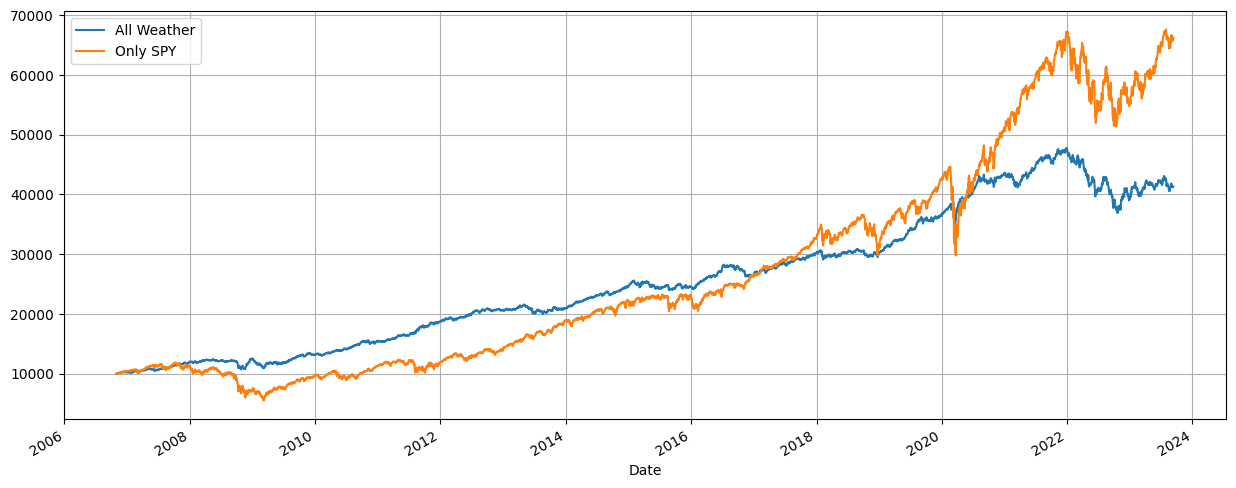

In [56]:
frame = { 
    'All Weather': all_weather_df['total_value'], 
    'Only SPY': only_spy_df['total_value']
} 
  
graph_df = pd.DataFrame(frame) 
graph_df.plot(figsize=(15, 6), grid=True)

In [42]:
# Step 4: Test Inputs/Tweak Strategy

In [43]:
portfolio_2 = [
    {
        'symbol': 'SPY', # S&P 500
        'weight': 0.6
    },
    {
        'symbol': 'TLT', # Long term bonds
        'weight': 0.4
    },
]

for asset in portfolio_2:
    returns = get_returns_for_asset(asset['symbol'])
    asset['returns'] = returns
    

portfolio_2_df = pd.DataFrame()

for asset in portfolio_2:
    returns = asset['returns']
    for column in returns.columns:
        column_name = "{}_{}".format(column, asset['symbol'])
        print(column_name)
        portfolio_2_df[column_name] = returns[column]
            
        
portfolio_2_df = portfolio_2_df.dropna()
portfolio_2_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
price_SPY
dividend_SPY
price_change_SPY
dividend_yield_SPY
return_SPY
price_TLT
dividend_TLT
price_change_TLT
dividend_yield_TLT
return_TLT


,price_SPY,dividend_SPY,price_change_SPY,dividend_yield_SPY,return_SPY,price_TLT,dividend_TLT,price_change_TLT,dividend_yield_TLT,return_TLT
Date,,,,,,,,,,
2002-07-31,61.068653,0.0,0.002419,0.0,0.002419,40.872025,0.0,0.012389,0.0,0.012389
2002-08-01,59.474285,0.0,-0.026108,0.0,-0.026108,41.104816,0.0,0.005696,0.0,0.005696
2002-08-02,58.141186,0.0,-0.022415,0.0,-0.022415,41.525764,0.0,0.010241,0.0,0.010241
2002-08-05,56.118046,0.0,-0.034797,0.0,-0.034797,41.708969,0.0,0.004412,0.0,0.004412
2002-08-06,58.007198,0.0,0.033664,0.0,0.033664,41.352394,0.0,-0.008549,0.0,-0.008549
...,...,...,...,...,...,...,...,...,...,...
2023-09-05,449.239990,0.0,-0.004322,0.0,-0.004322,93.519997,0.0,-0.014022,0.0,-0.014022
2023-09-06,446.220001,0.0,-0.006722,0.0,-0.006722,93.750000,0.0,0.002459,0.0,0.002459
2023-09-07,444.850006,0.0,-0.003070,0.0,-0.003070,94.010002,0.0,0.002773,0.0,0.002773


In [44]:
portfolio_2_df = portfolio_2_df['2006-10-31':]
portfolio_2_df

,price_SPY,dividend_SPY,price_change_SPY,dividend_yield_SPY,return_SPY,price_TLT,dividend_TLT,price_change_TLT,dividend_yield_TLT,return_TLT
Date,,,,,,,,,,
2006-10-31,99.472626,0.0,-0.000146,0.0,-0.000146,54.415539,0.000,0.007742,0.000000,0.007742
2006-11-01,98.801270,0.0,-0.006749,0.0,-0.006749,54.716663,0.345,0.005534,0.006305,0.011839
2006-11-02,98.743507,0.0,-0.000585,0.0,-0.000585,54.491596,0.000,-0.004113,0.000000,-0.004113
2006-11-03,98.570305,0.0,-0.001754,0.0,-0.001754,53.846851,0.000,-0.011832,0.000000,-0.011832
2006-11-06,99.681992,0.0,0.011278,0.0,0.011278,54.004997,0.000,0.002937,0.000000,0.002937
...,...,...,...,...,...,...,...,...,...,...
2023-09-05,449.239990,0.0,-0.004322,0.0,-0.004322,93.519997,0.000,-0.014022,0.000000,-0.014022
2023-09-06,446.220001,0.0,-0.006722,0.0,-0.006722,93.750000,0.000,0.002459,0.000000,0.002459
2023-09-07,444.850006,0.0,-0.003070,0.0,-0.003070,94.010002,0.000,0.002773,0.000000,0.002773


In [45]:
portfolio_2_df = get_returns_for_portfolio(portfolio_2, portfolio_2_df)
portfolio_2_df

,price_SPY,dividend_SPY,price_change_SPY,dividend_yield_SPY,return_SPY,price_TLT,dividend_TLT,price_change_TLT,dividend_yield_TLT,return_TLT,quantity_SPY,value_SPY,quantity_TLT,value_TLT,required_amount_SPY,required_quantity_SPY,required_amount_TLT,required_quantity_TLT,total_value,return
Date,,,,,,,,,,,,,,,,,,,,
2006-10-31,99.472626,0.0,-0.000146,0.0,-0.000146,54.415539,0.000,0.007742,0.000000,0.007742,0.000000,0.000000,0.000000,0.000000,6000.000000,60.318102,4000.000000,73.508415,10000.000000,NaN
2006-11-01,98.801270,0.0,-0.006749,0.0,-0.006749,54.716663,0.345,0.005534,0.006305,0.011839,60.318102,5959.505068,73.508415,4022.135190,6004.200397,60.770478,4002.800264,73.155050,10007.000661,0.000700
2006-11-02,98.743507,0.0,-0.000585,0.0,-0.000585,54.491596,0.000,-0.004113,0.000000,-0.004113,60.770478,6000.690163,73.155050,3986.335467,5992.215378,60.684652,3994.810252,73.310575,9987.025630,-0.001996
2006-11-03,98.570305,0.0,-0.001754,0.0,-0.001754,53.846851,0.000,-0.011832,0.000000,-0.011832,60.684652,5981.704644,73.310575,3947.543635,5957.548967,60.439592,3971.699311,73.759175,9929.248278,-0.005785
2006-11-06,99.681992,0.0,0.011278,0.0,0.011278,54.004997,0.000,0.002937,0.000000,0.002937,60.439592,6024.738858,73.759175,3983.364023,6004.861728,60.240186,4003.241152,74.127236,10008.102880,0.007942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05,449.239990,0.0,-0.004322,0.0,-0.004322,93.519997,0.000,-0.014022,0.000000,-0.014022,79.942012,35913.148834,253.516340,23708.847292,35773.197675,79.630484,23848.798450,255.012824,59621.996126,-0.008202
2023-09-06,446.220001,0.0,-0.006722,0.0,-0.006722,93.750000,0.000,0.002459,0.000000,0.002459,79.630484,35532.714490,255.012824,23907.452256,35664.100047,79.924925,23776.066698,253.611378,59440.166746,-0.003050
2023-09-07,444.850006,0.0,-0.003070,0.0,-0.003070,94.010002,0.000,0.002773,0.000000,0.002773,79.924925,35554.603291,253.611378,23842.006198,35637.965693,80.112319,23758.643796,252.724638,59396.609489,-0.000733


In [46]:
cagr(portfolio_2_df)

0.11167226742640723

In [47]:
volatility(portfolio_2_df)

0.11434338582818204

In [48]:
sharpe(portfolio_2_df, 0.02)

0.8017277673074895

In [49]:
max_drawdown(portfolio_2_df)

{'drawdown': 0.2623673458345784, 'date': Timestamp('2022-10-20 00:00:00')}

<Axes: xlabel='Date'>

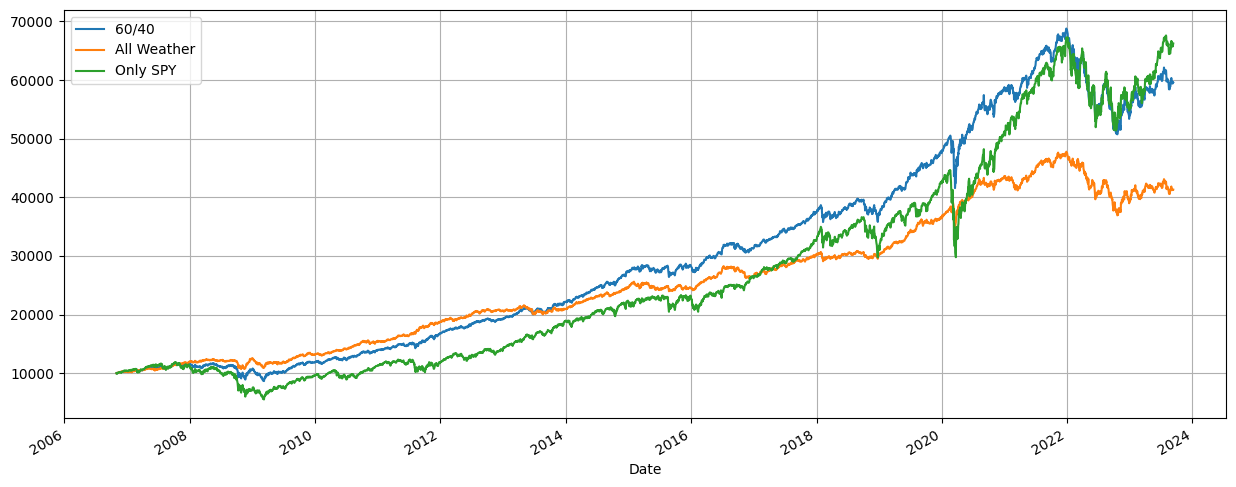

In [61]:
frame = { 
    '60/40': portfolio_2_df['total_value'], 
    'All Weather': all_weather_df['total_value'], 
    'Only SPY': only_spy_df['total_value']
} 
  
graph_df = pd.DataFrame(frame) 
graph_df.plot(figsize=(15, 6), grid=True)